# 1. Importação / Raw Data Ingestion

In [1]:
import numpy as np, pandas as pd
import scipy
import os
import tarfile
import urllib
import logging

In [15]:
diretorio = fr'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML'
diretorio_df = fr'{diretorio}\\DATAFRAMES'
diretorio_data = r'data\external'
arquivo = r'CENSO-BASE DE DADOS-para dashboard-r01.xlsx'

In [19]:
dataset = pd.read_excel(os.path.join(os.path.abspath(os.path.join(os.getcwd(), "..")),diretorio_data, arquivo), header=1, index_col=0)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45386 entries, ID to 45385
Columns: 427 entries, Unnamed: 1 to Unnamed: 427
dtypes: float64(76), object(351)
memory usage: 148.2+ MB


In [20]:
dataset.shape

(45386, 427)

In [21]:
dataset.dtypes

Unnamed: 1       object
Unnamed: 2       object
Unnamed: 3       object
Unnamed: 4       object
Unnamed: 5      float64
                 ...   
Unnamed: 423    float64
Unnamed: 424     object
Unnamed: 425     object
Unnamed: 426     object
Unnamed: 427    float64
Length: 427, dtype: object

In [23]:
dataset.describe()

,Unnamed: 5,Unnamed: 18,Unnamed: 21,Unnamed: 24,Unnamed: 33,Unnamed: 42,Unnamed: 47,Unnamed: 53,Unnamed: 59,Unnamed: 65,...,Unnamed: 371,Unnamed: 375,Unnamed: 380,Unnamed: 386,Unnamed: 394,Unnamed: 402,Unnamed: 410,Unnamed: 417,Unnamed: 423,Unnamed: 427
count,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,...,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000
mean,0.041313,0.076854,0.072447,0.074496,0.093489,0.116118,0.089038,0.091374,0.390173,0.336741,...,0.160009,0.160648,0.197136,0.206412,0.172238,0.248849,0.207425,0.227168,0.183056,0.178275
std,0.199016,0.266362,0.259229,0.262579,0.291120,0.320369,0.284802,0.288143,0.487794,0.472601,...,0.366618,0.367210,0.397840,0.404734,0.377591,0.432351,0.405467,0.419006,0.386717,0.382748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2. Data processing
Preprocessing involves the process of pre-curating the dataset before actual analysis. Common tasks involve correctly exporting the dataset,
placing them under the right tables, structuring them, and exporting them in the correct format.

A feature is a numeric representation of raw data. The right features are relevant to the task at hand and should be easy for the model to ingest.

Feature engineering is the process of formulating the most appropriate features given the data, the model, and the task.
The number of features is also important. If there are not enough informative features, then the model will be unable to perform the ultimate task. If there are too many features, or if most of them are irrelevant, then the model will be more expensive and tricky to train. Something might go awry in the training process that impacts the model’s performance  (ZHENG and CASARI, 2018, p.17).

__DATA to achieve TASK through MODEL__ [using features];

Coming up with a good set of features to train on.
***
1. __Feature selection__  - Selecting the most useful features to train on among existing features. Another way to simplify models, reducing the dimensions that the models work with, when discarding discard attributes that appear to be irrelevant. (RUSSEL and NORVIG, XXX, p.713).; 
2. __Feature extraction__ - Combining existing features to produce a more useful one—as we saw earlier, dimensionality reduction algorithms can help; 
3. Creating new features by gathering new data

### 1.1.2 Feature Transformation

## 2.1. Extração de Atributos / Feature Extraction

In [24]:
tags = [
    "UF","DATA_NASC_ANO","ATIV_ALTERNATIVA_SIM","ATIV_ALTERNATIVA_NAO","ATIV_ALTERNATIVA_NULO",
    "RENDA_FONTE_APOSENTADO","RENDA_FONTE_ASSALARIADO1","RENDA_FONTE_ASSALARIADO2","RENDA_FONTE_ASSALARIADO3","RENDA_FONTE_ASSALARIADO4",
    "RENDA_FONTE_AUTONOMO1","RENDA_FONTE_AUTONOMO2","RENDA_FONTE_EMPRESARIO1","RENDA_FONTE_EMPRESARIO2","RENDA_FONTE_OUTROS",
    "RENDA_FONTE_ALUGUEL","RENDA_FONTE_SEGURO","RENDA_FONTE_NULO","IMOVEL_SIM","IMOVEL_NAO","IMOVEL_NULO", "CARRO_SIM", "CARRO_NAO","CARRO_NULO",
    "RENDA_MENSAL_INDIV1","RENDA_MENSAL_INDIV2","RENDA_MENSAL_INDIV3","RENDA_MENSAL_INDIV4","RENDA_MENSAL_INDIV5","RENDA_MENSAL_INDIV6",
    "RENDA_MENSAL_INDIV7","RENDA_MENSAL_INDIV8","RENDA_MENSAL_INDIV_NULO",
    "RENDA_MENSAL_FAM1","RENDA_MENSAL_FAM2","RENDA_MENSAL_FAM3","RENDA_MENSAL_FAM4","RENDA_MENSAL_FAM5","RENDA_MENSAL_FAM6",
    "RENDA_MENSAL_FAM7","RENDA_MENSAL_FAM8","RENDA_MENSAL_FAM_NULO",
    "PARTICIPACAO_EVENTOS1","PARTICIPACAO_EVENTOS2","PARTICIPACAO_EVENTOS3","PARTICIPACAO_EVENTOS4","PARTICIPACAO_EVENTOS_NULO",
    "SATISFACAO_IES1","SATISFACAO_IES2","SATISFACAO_IES3","SATISFACAO_IES4","SATISFACAO_IES5","SATISFACAO_IES_NULO",
    "FONTE_PUBLI_ACADEM1","FONTE_PUBLI_ACADEM2","FONTE_PUBLI_ACADEM3","FONTE_PUBLI_ACADEM4","FONTE_PUBLI_ACADEM5","FONTE_PUBLI_ACADEM_NULO",
    "FONTE_REVISTAS_ARQ1","FONTE_REVISTAS_ARQ2","FONTE_REVISTAS_ARQ3","FONTE_REVISTAS_ARQ4","FONTE_REVISTAS_ARQ5","FONTE_REVISTAS_ARQ_NULO",
    "FONTE_LIVROS_TEC1","FONTE_LIVROS_TEC2","FONTE_LIVROS_TEC3","FONTE_LIVROS_TEC4","FONTE_LIVROS_TEC5","FONTE_LIVROS_TEC_NULO",
    "FONTE_SITES_ARQ1","FONTE_SITES_ARQ2","FONTE_SITES_ARQ3","FONTE_SITES_ARQ4","FONTE_SITES_ARQ5","FONTE_SITES_ARQ_NULO",
    "FONTE_JORNAIS1","FONTE_JORNAIS2","FONTE_JORNAIS3","FONTE_JORNAIS4","FONTE_JORNAIS5","FONTE_JORNAIS_NULO",
    "FONTE_REVISTAS1","FONTE_REVISTAS2","FONTE_REVISTAS3","FONTE_REVISTAS4","FONTE_REVISTAS5","FONTE_REVISTAS_NULO",
    "FONTE_TV_ABERTA1","FONTE_TV_ABERTA2","FONTE_TV_ABERTA3","FONTE_TV_ABERTA4","FONTE_TV_ABERTA5","FONTE_TV_ABERTA_NULO",
    "FONTE_TV_FECHADA1","FONTE_TV_FECHADA2","FONTE_TV_FECHADA3","FONTE_TV_FECHADA4","FONTE_TV_FECHADA5","FONTE_TV_FECHADA_NULO",
    "INTERNET1","INTERNET2","INTERNET3","INTERNET4","INTERNET5","INTERNET_NULO",
    "LIVROS_GERAIS1","LIVROS_GERAIS2","LIVROS_GERAIS3","LIVROS_GERAIS4","LIVROS_GERAIS5","LIVROS_GERAIS_NULO",
    "RADIO1","RADIO2","RADIO3","RADIO4","RADIO5","RADIO_NULO",
    "COM_OUTROS1","COM_OUTROS2","COM_OUTROS3","COM_OUTROS4","COM_OUTROS5","COM_OUTROS_NULO",
    "EQUIP_DESKTOP1","EQUIP_DESKTOP2","EQUIP_DESKTOP3","EQUIP_DESKTOP4","EQUIP_DESKTOP5","EQUIP_DESKTOP_NULO",
    "EQUIP_NOTEBOOK1","EQUIP_NOTEBOOK2","EQUIP_NOTEBOOK3","EQUIP_NOTEBOOK4","EQUIP_NOTEBOOK5","EQUIP_NOTEBOOK_NULO",
    "EQUIP_TABLET1","EQUIP_TABLET2","EQUIP_TABLET3","EQUIP_TABLET4","EQUIP_TABLET5","EQUIP_TABLET_NULO",
    "EQUIP_SMARTPHONE1","EQUIP_SMARTPHONE2","EQUIP_SMARTPHONE3","EQUIP_SMARTPHONE4","EQUIP_SMARTPHONE5","EQUIP_SMARTPHONE_OUTROS",
    "EQUIP_DUMBPHONE1","EQUIP_DUMBPHONE2","EQUIP_DUMBPHONE3","EQUIP_DUMBPHONE4","EQUIP_DUMBPHONE5","EQUIP_DUMBPHONE_NULO",
    "EQUIP_OUTROS1","EQUIP_OUTROS2","EQUIP_OUTROS3","EQUIP_OUTROS4","EQUIP_OUTROS5","EQUIP_OUTROS_NULO",
    "DOMINIO_INFORMATICA1","DOMINIO_INFORMATICA2","DOMINIO_INFORMATICA3","DOMINIO_INFORMATICA4","DOMINIO_INFORMATICA5","DOMINIO_INFORMATICA_NULO",
    "DOMINIO_CAD1","DOMINIO_CAD2","DOMINIO_CAD3","DOMINIO_CAD4","DOMINIO_CAD5","DOMINIO_CAD_NULO",
    "DOMINIO_GEOPROC1","DOMINIO_GEOPROC2","DOMINIO_GEOPROC3","DOMINIO_GEOPROC4","DOMINIO_GEOPROC5","DOMINIO_GEOPROC_NULO",
    "DOMINIO_SOFT_OUTROS1","DOMINIO_SOFT_OUTROS2","DOMINIO_SOFT_OUTROS3","DOMINIO_SOFT_OUTROS4","DOMINIO_SOFT_OUTROS5","DOMINIO_SOFT_OUTROS_NULO",
    "REDE_FACEBOOK_SIM","REDE_FACEBOOK_NAO","REDE_FACEBOOK_NULO",
    "REDE_TWITTER_SIM","REDE_TWITTER_NAO","REDE_TWITTER_NULO",
    "REDE_LINKED_SIM","REDE_LINKED_NAO","REDE_LINKED_NULO",
    "REDE_INSTAGRAM_SIM","REDE_INSTAGRAM_NAO","REDE_INSTAGRAM_NULO",
    "REDE_OUTRAS_SIM","REDE_OUTRAS_NAO","REDE_OUTRAS_NULO",
    "LEITURA_LIVROS1","LEITURA_LIVROS2","LEITURA_LIVROS3","LEITURA_LIVROS4","LEITURA_LIVROS5","LEITURA_LIVROS6","LEITURA_LIVROS7","LEITURA_LIVROS_NULO",
    "INTERESSES_A","INTERESSES_B","INTERESSES_C","INTERESSES_D","INTERESSES_E","INTERESSES_F","INTERESSES_G","INTERESSES_H","INTERESSES_I","INTERESSES_J",
    "IDIOMAS_INGLES_1","IDIOMAS_INGLES_2","IDIOMAS_INGLES_3","IDIOMAS_INGLES_4","IDIOMAS_INGLES_NULO",
    "IDIOMAS_FRANCES_1","IDIOMAS_FRANCES_2","IDIOMAS_FRANCES_3","IDIOMAS_FRANCES_4","IDIOMAS_FRANCES_NULO",
    "IDIOMAS_ESPANHOL_1","IDIOMAS_ESPANHOL_2","IDIOMAS_ESPANHOL_3","IDIOMAS_ESPANHOL_4","IDIOMAS_ESPANHOL_NULO",
    "IDIOMAS_OUTROS","IDIOMAS_APENAS_PT","IDIOMAS_NULO",
    "RACA_BRANCA","RACA_INDIGENA","RACA_MESTICA","RACA_PRETA","RACA_ORIENTAL","RACA_PARDA","RACA_N_INFORM","RACA_NULO",
    "GENERO_M_CIS","GENERO_M_TRANS","GENERO_H_CIS","GENERO_H_TRANS","GENERO_NB","GENERO_NAO_INFORM","GENERO_NULO",
    "PCD_FISICA","PCD_MENTAL","PCD_INTELECTUAL","PCD_SENSORIAL","PCD_NENHUMA","PCD_NULO",
    "PCD_A_1","PCD_A_2","PCD_A_3","PCD_A_4","PCD_A_5","PCD_A_NULO",
    "FILIADO_ABAP","FILIADO_ABEA","FILIADO_ASBEA","FILIADO_FNA","FILIADO_IAB","FILIADO_NAO_FILIADO","FILIADO_NAO_OUTROS","FILIADO_NULO",
    "EXERC_PROF_OBSTACULO_REMUNERACAO","EXERC_PROF_OBSTACULO_ACESSO_MERCADO","EXERC_PROF_OBSTACULO_VALORIZACAO_SOCIEDADE","EXERC_PROF_OBSTACULO_NULO",
    "PROF_STATUS3","PROF_STATUS2","PROF_STATUS4","PROF_STATUS1","PROF_STATUS5","PROF_STATUS_NULO",
    "PROF_EXERCICIO3","PROF_EXERCICIO2","PROF_EXERCICIO4","PROF_EXERCICIO1","PROF_EXERCICIO5","PROF_EXERCICIO_NULO",
    "PROF_REND3","PROF_REND2","PROF_REND4","PROF_REND1","PROF_REND5","PROF_REND_NULO",
    "PROF_TEC3","PROF_TEC2","PROF_TEC4","PROF_TEC1","PROF_TEC5","PROF_TEC_NULO",
    "AREATUACAO_A","AREATUACAO_B","AREATUACAO_C","AREATUACAO_D","AREATUACAO_E","AREATUACAO_F","AREATUACAO_G","AREATUACAO_H","AREATUACAO_I","AREATUACAO_J",
    "AREATUACAO_K","AREATUACAO_L","AREATUACAO_M","AREATUACAO_OUTRAS","AREATUACAO_NULO",
    "AVAL_MERCADO_AU3","AVAL_MERCADO_AU2","AVAL_MERCADO_AU1","AVAL_MERCADO_AU_SEMRESP","AVAL_MERCADO_AU_NULO",
    "AVAL_MERCADO_IMOB3","AVAL_MERCADO_IMOB2","AVAL_MERCADO_IMOB1","AVAL_MERCADO_IMOB_SEMRESP","AVAL_MERCADO_IMOB_NULO",
    "AVAL_MERCADO_HOTEL3","AVAL_MERCADO_HOTEL2","AVAL_MERCADO_HOTEL1","AVAL_MERCADO_HOTEL_SEMRESP","AVAL_MERCADO_HOTEL_NULO",
    "AVAL_MERCADO_HOSP3","AVAL_MERCADO_HOSP2","AVAL_MERCADO_HOSP1","AVAL_MERCADO_AHOSP_SEMRESP","AVAL_MERCADO_HOSP_NULO",
    "AVAL_MERCADO_INEXP_SIM","AVAL_MERCADO_INEXP_NAO","AVAL_MERCADO_INEXP_NULO",
    "DEPENDENTES_A","DEPENDENTES_B","DEPENDENTES_C","DEPENDENTES_NAO_POSSUI","DEPENDENTES_OUTROS","DEPENDENTES_NULO",
    "TRABALHA_EM_AU_SIM","TRABALHA_EM_NAO","TRABALHA_EM_NULO",
    "PJ_SIM_MISTA","PJ_SIM_UNI","PJ_NAO","PJ_NULO",
    "PJ_SIM_PRIVADA","PJ_SIM_PUBLICA","PJ_SIM_PUBLICA_PRIVADA","PJ_2_NAO","PJ_2_NULO",
    "ESCOLARIDADE1","ESCOLARIDADE2","ESCOLARIDADE3","ESCOLARIDADE4","ESCOLARIDADE5","ESCOLARIDADE_SEMRESP","ESCOLARIDADE_NULO",
    "OUTROCURSO_POSSUI_SIM","OUTROCURSO_POSSUI_NAO","OUTROCURSO_POSSUI_NULO",
    "OUTROCURSO_CURSANDO_SIM","OUTROCURSO_CURSANDO_NAO","OUTROCURSO_CURSANDO_NULO",
    "OUTROCURSO_PRETENDE_SIM","OUTROCURSO_PRETENDE_NAO","OUTROCURSO_PRETENDE_NULO",
    "SITES_CAU_BR","SITES_CAU_UF","SITES_CAU_NAO","SITES_CAU_NULO",
    "CONTRATANTES_PF","CONTRATANTES_PJ","CONTRATANTES_ORGAO_PUBLICO","CONTRATANTES_ESTRANGEIRO","CONTRATANTES_NULO",
    "REF_HONORARIOS_CUB","REF_HONORARIOS_TABELA_CAUBR","REF_HONORARIOS_TABELA_IAB","REF_HONORARIOS_M2","REF_HONORARIOS_OUTROS","REF_HONORARIOS_NULO",
    "HORAS_AU5","HORAS_AU4","HORAS_AU3","HORAS_AU2","HORAS_AU1","HORAS_AU_NAOTRAB","HORAS_AU_ESPORADICAMENTE","HORAS_AU_NULO",
    "HORAS_NAO_AU5","HORAS_NAO_AU4","HORAS_NAO_AU3","HORAS_NAO_AU2","HORAS_NAO_AU1","HORAS_NAO_AU_NAOTRAB","HORAS_NAO_AU_ESPORADICAMENTE","HORAS_NAO_AU_NULO",
    "SITE_ABAP","SITE_ABEA","SITE_ASBEA","SITE_FNA","SITE_IAB","SITE_OUTROS","SITE_NAO_FREQUENTA","SITE_NULO",
    "ATIV_PROJ_BASICO","ATIV_PROJ_EXEC","ATIV_COORD","ATIV_COMPLEMENTARES","ATIV_FISC_OBRA","ATIV_EXEC_OBRA","ATIV_NULO",
    "POLITICA_A","POLITICA_B","POLITICA_C","POLITICA_D","POLITICA_OUTROS","POLITICA_NULO",
    "DOCENTE_SIM_DE","DOCENTE_SIM_MISTO","DOCENTE_NAO","DOCENTE_NULO"
       ]


In [25]:
dic_nome = {}
for (index, colname) in enumerate(dataset):
    if index < 427:
        classe = tags[index]
        dic_nome[colname] = classe
        #print(f'{index} | {colname} | {classe}')

In [26]:
dataset.rename(dic_nome, axis=1, inplace=True)
dataset.drop(dataset.index[0], axis=0, inplace=True)
dataset

,UF,DATA_NASC_ANO,ATIV_ALTERNATIVA_SIM,ATIV_ALTERNATIVA_NAO,ATIV_ALTERNATIVA_NULO,RENDA_FONTE_APOSENTADO,RENDA_FONTE_ASSALARIADO1,RENDA_FONTE_ASSALARIADO2,RENDA_FONTE_ASSALARIADO3,RENDA_FONTE_ASSALARIADO4,...,POLITICA_A,POLITICA_B,POLITICA_C,POLITICA_D,POLITICA_OUTROS,POLITICA_NULO,DOCENTE_SIM_DE,DOCENTE_SIM_MISTO,DOCENTE_NAO,DOCENTE_NULO
1,RJ,1967,0,1,0.0,0,0,0,1,0,...,0,1,0,0,0,0.0,0,0,1,0.0
2,SE,1980,0,1,0.0,0,0,0,0,0,...,0,1,0,0,0,0.0,0,0,1,0.0
3,DF,1993,0,1,0.0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
4,RO,1995,0,1,0.0,0,0,0,0,0,...,0,0,1,0,0,0.0,0,0,1,0.0
5,GO,1987,0,1,0.0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45381,RS,1982,1,0,0.0,0,0,0,0,1,...,1,0,0,0,0,0.0,0,0,1,0.0
45382,DF,1968,0,1,0.0,0,0,0,0,0,...,0,1,0,0,0,0.0,0,0,1,0.0
45383,BA,1980,0,1,0.0,0,0,0,1,0,...,0,1,0,0,0,0.0,0,0,1,0.0
45384,SE,1980,1,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0


In [27]:
dataset.describe()

,ATIV_ALTERNATIVA_NULO,RENDA_FONTE_NULO,IMOVEL_NULO,CARRO_NULO,RENDA_MENSAL_INDIV_NULO,RENDA_MENSAL_FAM_NULO,PARTICIPACAO_EVENTOS_NULO,SATISFACAO_IES_NULO,FONTE_PUBLI_ACADEM_NULO,FONTE_REVISTAS_ARQ_NULO,...,OUTROCURSO_PRETENDE_NULO,SITES_CAU_NULO,CONTRATANTES_NULO,REF_HONORARIOS_NULO,HORAS_AU_NULO,HORAS_NAO_AU_NULO,SITE_NULO,ATIV_NULO,POLITICA_NULO,DOCENTE_NULO
count,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,...,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000,45385.000000
mean,0.041313,0.076854,0.072447,0.074496,0.093489,0.116118,0.089038,0.091374,0.390173,0.336741,...,0.160009,0.160648,0.197136,0.206412,0.172238,0.248849,0.207425,0.227168,0.183056,0.178275
std,0.199016,0.266362,0.259229,0.262579,0.291120,0.320369,0.284802,0.288143,0.487794,0.472601,...,0.366618,0.367210,0.397840,0.404734,0.377591,0.432351,0.405467,0.419006,0.386717,0.382748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df = dataset.copy()

In [29]:
df.columns.get_loc('RENDA_MENSAL_INDIV1')

24

In [30]:
UF_nordeste = ['CE','PI','SE','PE','BA','MA','RN','PB','AL']
UF_norte = ['AP','AM','PA','AC','RO','RR','TO']
UF_sudeste = ['MG','ES','RJ','SP']
UF_centroeste = ['GO','MT','MS','DF']
UF_sul = ['PR','SC','RS']

In [31]:
for index, row in df.iterrows():
    row = row.copy()
    
    #indice_renda_m_individual = ((row['RENDA_MENSAL_INDIV1']) + (row['RENDA_MENSAL_INDIV2']*2) + (row['RENDA_MENSAL_INDIV3']*3) + (row['RENDA_MENSAL_INDIV4']*4) + (row['RENDA_MENSAL_INDIV5']*5) + (row['RENDA_MENSAL_INDIV6']*6) + (row['RENDA_MENSAL_INDIV7']*7) + (row['RENDA_MENSAL_INDIV8']*0))
    indice_renda_m_individual = ((row['RENDA_MENSAL_INDIV1']) + (row['RENDA_MENSAL_INDIV2']*2) + (row['RENDA_MENSAL_INDIV3']*3) + (row['RENDA_MENSAL_INDIV4']*4) + (row['RENDA_MENSAL_INDIV5']*5) + (row['RENDA_MENSAL_INDIV6']*6) + (row['RENDA_MENSAL_INDIV7']*7))
    if (indice_renda_m_individual == 0): indice_renda_m_individual = np.nan
    #if (indice_renda_m_individual == 0): indice_renda_m_individual = 0
    df.at[index, 'RENDA_M_INDIVIDUAL'] = indice_renda_m_individual
    #print(indice_renda_m_individual)
    
    indice_renda_m_fam = ((row['RENDA_MENSAL_FAM1']) + (row['RENDA_MENSAL_FAM2']*2) + (row['RENDA_MENSAL_FAM3']*3) + (row['RENDA_MENSAL_FAM4']*4) + (row['RENDA_MENSAL_FAM5']*5) + (row['RENDA_MENSAL_FAM6']*6) + (row['RENDA_MENSAL_FAM7']*7) + (row['RENDA_MENSAL_FAM8']*8))
    if (indice_renda_m_fam == 0): indice_renda_m_fam = np.nan
    #if (indice_renda_m_fam == 0): indice_renda_m_fam = 0
    df.at[index, 'RENDA_M_FAMILIAR'] = indice_renda_m_fam
    #print(indice_renda_m_fam)
    
    indice_renda_extra = (row['RENDA_FONTE_OUTROS']*1)+(row['RENDA_FONTE_ALUGUEL']*1)+(row['RENDA_FONTE_SEGURO']*1)+(row['RENDA_FONTE_APOSENTADO']*1)
    if (indice_renda_extra == 0): indice_renda_extra = np.nan
    #if (indice_renda_extra == 0): indice_renda_extra = 0
    df.at[index, 'FONTE_RENDA_EXTRA'] = indice_renda_extra
    
    indice_renda_nao_au = (row['RENDA_FONTE_ASSALARIADO1']*1)+(row['RENDA_FONTE_ASSALARIADO4']*1)+(row['RENDA_FONTE_AUTONOMO2']*1)+(row['RENDA_FONTE_EMPRESARIO2']*1)
    if (indice_renda_nao_au == 0): indice_renda_nao_au = np.nan
    #if (indice_renda_nao_au == 0): indice_renda_nao_au = 0
    df.at[index, 'FONTE_RENDA_NAO_AU'] = indice_renda_nao_au
    
    indice_renda_au = (row['RENDA_FONTE_ASSALARIADO2']*1)+(row['RENDA_FONTE_ASSALARIADO3']*1)+(row['RENDA_FONTE_AUTONOMO1']*1)+(row['RENDA_FONTE_EMPRESARIO1']*1)
    if (indice_renda_au == 0): indice_renda_au = np.nan
    #if (indice_renda_au == 0): indice_renda_au = 0
    df.at[index, 'FONTE_RENDA_AU'] = indice_renda_au    
    
    #indice_horas_trab_au = ((row['HORAS_AU5']*5)+(row['HORAS_AU4']*4) + (row['HORAS_AU3']*3) + (row['HORAS_AU2']*2) + (row['HORAS_AU1']*1) + (row['HORAS_AU_ESPORADICAMENTE']*0.5))
    #if (indice_horas_trab_au == 0): indice_horas_trab_au = np.nan
    #df2.at[index, "INDICE_HORAS_TRAB_AU"] = indice_horas_trab_au
    
    indices_filiado_entidades = (row['FILIADO_ABAP']+row['FILIADO_ABEA']+row['FILIADO_ASBEA']+row['FILIADO_FNA']+row['FILIADO_IAB']+row['FILIADO_NAO_OUTROS'])
    if (indices_filiado_entidades == 0) and (row["FILIADO_NAO_FILIADO"] != 1): indices_filiado_entidades = np.nan
    #if (indices_filiado_entidades == 0) and (row["FILIADO_NAO_FILIADO"] != 1): indices_filiado_entidades = 0
    if (indices_filiado_entidades == 0) and (row["FILIADO_NAO_FILIADO"] == 1): indices_filiado_entidades = 0
    df.at[index, "QNTD_ENTIDADES_FILIADAS"] = indices_filiado_entidades
    
    indice_horas_trab_au = ((row['HORAS_AU5']*5)+(row['HORAS_AU4']*4) + (row['HORAS_AU3']*3) + (row['HORAS_AU2']*2) + (row['HORAS_AU1']*1) + (row['HORAS_AU_ESPORADICAMENTE']*0))
    if (indice_horas_trab_au == 0): indice_horas_trab_au = np.nan
    df.at[index, "HH_EM_AU"] = indice_horas_trab_au

    indice_horas_trab_comb = (indice_horas_trab_au)
    renda_trab = (indice_renda_m_individual / indice_horas_trab_comb)
    if (renda_trab == 0): renda_trab = np.nan
    df.at[index, "RENDA_POR_HH_AU"] = renda_trab
    
    indice_horas_trab_nao_au = ((row['HORAS_NAO_AU5']*5)+(row['HORAS_NAO_AU4']*4) + (row['HORAS_NAO_AU3']*3) + (row['HORAS_NAO_AU2']*2) + (row['HORAS_NAO_AU1']*1) + (row['HORAS_NAO_AU_ESPORADICAMENTE']*0.5))
    if (indice_horas_trab_nao_au == 0): indice_horas_trab_nao_au = np.nan
    df.at[index, "HH_FORA_AU"] = indice_horas_trab_nao_au
    
    indice_horas_trab_comb = (indice_horas_trab_au + indice_horas_trab_nao_au)
    renda_trab = (indice_renda_m_individual / indice_horas_trab_comb)
    if (renda_trab == 0): renda_trab = np.nan
    df.at[index, "RENDA_POR_HH_TOTAL"] = renda_trab

    indice_idiomas = int(((row['IDIOMAS_INGLES_1']) + (row['IDIOMAS_INGLES_2']*2) + (row['IDIOMAS_INGLES_3']*3) +
                      (row['IDIOMAS_ESPANHOL_1']*1) + (row['IDIOMAS_ESPANHOL_2']*2) + (row['IDIOMAS_ESPANHOL_3']*3) +
                      (row['IDIOMAS_FRANCES_1']*1) + (row['IDIOMAS_FRANCES_2']*2) + (row['IDIOMAS_FRANCES_3']*3) +
                      row['IDIOMAS_OUTROS']))
    if row['IDIOMAS_APENAS_PT'] == 1: indice_idiomas = 0.1
    if (indice_idiomas == 0): indice_idiomas = np.nan
    df.at[index, 'QNTD_IDIOMAS'] = indice_idiomas
    #print(indice_idiomas) 
    
    indice_escolaridade = int((row['ESCOLARIDADE1']) + (row['ESCOLARIDADE2']*2) + (row['ESCOLARIDADE3']*3) + (row['ESCOLARIDADE4']*4) + (row['ESCOLARIDADE5']*5))
        #+ row['OUTROCURSO_POSSUI_SIM']+row['OUTROCURSO_CURSANDO_SIM'])
    #if (indice_escolaridade == 0): indice_escolaridade = np.nan
    if (indice_escolaridade == 0): indice_escolaridade = 1
    df.at[index, 'ESCOLARIDADE'] = indice_escolaridade
    #print(indice_escolaridade) 
    
    indice_satisfacao_IES = int((row['SATISFACAO_IES1']*5) + (row['SATISFACAO_IES2']*4) + (row['SATISFACAO_IES3']*3) + (row['SATISFACAO_IES4']*2) + (row['SATISFACAO_IES5']*1))
    if (indice_satisfacao_IES == 0): indice_satisfacao_IES = np.nan
    df.at[index, 'INDICE_SATISFACAO_IES'] = indice_satisfacao_IES
    #print(indice_satisfacao_IES)
    
    indice_obstaculos_profissionais = ((row['EXERC_PROF_OBSTACULO_REMUNERACAO']*1) + (row['EXERC_PROF_OBSTACULO_ACESSO_MERCADO']*1) + (row['EXERC_PROF_OBSTACULO_VALORIZACAO_SOCIEDADE']*1))
    if (indice_obstaculos_profissionais == 0): indice_obstaculos_profissionais = np.nan
    df.at[index, 'INDICE_OBSTACULOS_PROFISSIONAIS'] = indice_obstaculos_profissionais
    #print(indice_obstaculos_profissionais)
    
    indice_safistacao_profissional = int((row['PROF_STATUS3']*3) + (row['PROF_STATUS2']*2) + (row['PROF_STATUS4']*4) + (row['PROF_STATUS1']*1) + (row['PROF_STATUS5']*5) +
                                         (row['PROF_EXERCICIO3']*3) + (row['PROF_EXERCICIO2']*2) + (row['PROF_EXERCICIO4']*4) + (row['PROF_EXERCICIO1']*1) + (row['PROF_EXERCICIO5']*5) + 
                                         (row['PROF_REND3']*3) + (row['PROF_REND2']*2) + (row['PROF_REND4']*4) + (row['PROF_REND1']*1) + (row['PROF_REND5']*5) + 
                                         (row['PROF_TEC3']*3) + (row['PROF_TEC2']*2) + (row['PROF_TEC4']*4) + (row['PROF_TEC1']*1) + (row['PROF_TEC5']*5))
    if (indice_safistacao_profissional == 0): indice_safistacao_profissional = np.nan
    df.at[index, 'INDICE_SATISFACAO_PROFISSIONAL'] = indice_safistacao_profissional
    #print(indice_safistacao_profissional)
    
    avaliacao_mercado_au = int((row['AVAL_MERCADO_AU3']*1)+(row['AVAL_MERCADO_AU2']*2)+(row['AVAL_MERCADO_AU1']*3))
    if (avaliacao_mercado_au == 0): avaliacao_mercado_au = np.nan
    df.at[index, 'AVALIACAO_MERCADO_AU'] = avaliacao_mercado_au
    
    avaliacao_mercado_outros = int(
        (row['AVAL_MERCADO_IMOB3']*1)+(row['AVAL_MERCADO_IMOB2']*2)+(row['AVAL_MERCADO_IMOB1']*3) +
        (row['AVAL_MERCADO_HOTEL3']*1)+(row['AVAL_MERCADO_HOTEL2']*2)+(row['AVAL_MERCADO_HOTEL1']*3) + 
        (row['AVAL_MERCADO_HOSP3']*1)+(row['AVAL_MERCADO_HOSP2']*2)+(row['AVAL_MERCADO_HOSP1']*3))
    if (avaliacao_mercado_outros == 0): avaliacao_mercado_outros = np.nan
    df.at[index, 'AVALIACAO_MERCADO_OUTROS'] = avaliacao_mercado_outros
                       
        
    #(row['AVAL_MERCADO_AU3']*1)+(row['AVAL_MERCADO_AU2']*2)+(row['AVAL_MERCADO_AU1']*3)+

    #"AVAL_MERCADO_INEXP_SIM","AVAL_MERCADO_INEXP_NAO","AVAL_MERCADO_INEXP_NULO",
    #"AVAL_MERCADO_INEXP_SIM_A","AVAL_MERCADO_INEXP_SIM_B","AVAL_MERCADO_INEXP_SIM_C","AVAL_MERCADO_INEXP_NAO","AVAL_MERCADO_INEXP_NULO",
    
    indice_formacao_continuada = int((row['FONTE_PUBLI_ACADEM1']*5) + (row['FONTE_PUBLI_ACADEM2']*4) + (row['FONTE_PUBLI_ACADEM3']*3) + (row['FONTE_PUBLI_ACADEM4']*2) + (row['FONTE_PUBLI_ACADEM5']*1) +
                                     (row['FONTE_REVISTAS_ARQ1']*5) + (row['FONTE_REVISTAS_ARQ2']*4) + (row['FONTE_REVISTAS_ARQ3']*3) + (row['FONTE_REVISTAS_ARQ4']*2) + (row['FONTE_REVISTAS_ARQ5']*1) +
                                     (row['FONTE_LIVROS_TEC1']*5) + (row['FONTE_LIVROS_TEC2']*4) + (row['FONTE_LIVROS_TEC3']*3) + (row['FONTE_LIVROS_TEC4']*2) + (row['FONTE_LIVROS_TEC5']*1) +
                                     (row['FONTE_SITES_ARQ1']*5) + (row['FONTE_SITES_ARQ2']*4) + (row['FONTE_SITES_ARQ3']*3) + (row['FONTE_SITES_ARQ4']*2) + (row['FONTE_SITES_ARQ5']*1) +
                                     (row['FONTE_JORNAIS1']*5) + (row['FONTE_JORNAIS2']*4) + (row['FONTE_JORNAIS3']*3) + (row['FONTE_JORNAIS4']*2) + (row['FONTE_JORNAIS5']*1) +
                                     (row['FONTE_REVISTAS1']*5) + (row['FONTE_REVISTAS2']*4) + (row['FONTE_REVISTAS3']*3) + (row['FONTE_REVISTAS4']*2) + (row['FONTE_REVISTAS5']*1) +
                                     (row['FONTE_TV_ABERTA1']*5) + (row['FONTE_TV_ABERTA2']*4) + (row['FONTE_TV_ABERTA3']*3) + (row['FONTE_TV_ABERTA4']*2) + (row['FONTE_TV_ABERTA5']*1) +
                                     (row['FONTE_TV_FECHADA1']*5) + (row['FONTE_TV_FECHADA2']*4) + (row['FONTE_TV_FECHADA3']*3) + (row['FONTE_TV_FECHADA4']*2) + (row['FONTE_TV_FECHADA5']*1) +
                                     (row['LIVROS_GERAIS1']*5) + (row['LIVROS_GERAIS2']*4) + (row['LIVROS_GERAIS3']*3) + (row['LIVROS_GERAIS4']*2) + (row['LIVROS_GERAIS5']*1) +
                                     (row['RADIO1']*5) + (row['RADIO2']*4) + (row['RADIO3']*3) + (row['RADIO4']*2) + (row['RADIO5']*1) +
                                     (row['COM_OUTROS1']*5) + (row['COM_OUTROS2']*4) + (row['COM_OUTROS3']*3) + (row['COM_OUTROS4']*2) + (row['COM_OUTROS5']*1))
    if (indice_formacao_continuada == 0): indice_formacao_continuada = np.nan
    df.at[index, 'INDICE_FORMACAO_CONTINUADA'] = indice_formacao_continuada
    #print(indice_formacao_continuada)
    
    indice_formacao_academica = int((row['FONTE_PUBLI_ACADEM1']*5) + (row['FONTE_PUBLI_ACADEM2']*4) + (row['FONTE_PUBLI_ACADEM3']*3) + (row['FONTE_PUBLI_ACADEM4']*2) + (row['FONTE_PUBLI_ACADEM5']*1) +
                                     (row['FONTE_REVISTAS_ARQ1']*5) + (row['FONTE_REVISTAS_ARQ2']*4) + (row['FONTE_REVISTAS_ARQ3']*3) + (row['FONTE_REVISTAS_ARQ4']*2) + (row['FONTE_REVISTAS_ARQ5']*1) +
                                     (row['FONTE_LIVROS_TEC1']*5) + (row['FONTE_LIVROS_TEC2']*4) + (row['FONTE_LIVROS_TEC3']*3) + (row['FONTE_LIVROS_TEC4']*2) + (row['FONTE_LIVROS_TEC5']*1) +
                                     (row['ESCOLARIDADE2']*1) + (row['ESCOLARIDADE3']*2) + (row['ESCOLARIDADE4']*5) + (row['ESCOLARIDADE5']*10)+
                                     (row['DOCENTE_SIM_DE']*10) + (row['DOCENTE_SIM_MISTO']*5)+
                                     #(row['FONTE_SITES_ARQ1']*5) + (row['FONTE_SITES_ARQ2']*4) + (row['FONTE_SITES_ARQ3']*3) + (row['FONTE_SITES_ARQ4']*2) + (row['FONTE_SITES_ARQ5']*1) +
                                     (row['PARTICIPACAO_EVENTOS1']) + (row['PARTICIPACAO_EVENTOS2']*2) + (row['PARTICIPACAO_EVENTOS3']*3) + (row['PARTICIPACAO_EVENTOS4']*4))
                                     #(row['FONTE_JORNAIS1']*5) + (row['FONTE_JORNAIS2']*4) + (row['FONTE_JORNAIS3']*3) + (row['FONTE_JORNAIS4']*2) + (row['FONTE_JORNAIS5']*1) +
                                     #(row['FONTE_REVISTAS1']*5) + (row['FONTE_REVISTAS2']*4) + (row['FONTE_REVISTAS3']*3) + (row['FONTE_REVISTAS4']*2) + (row['FONTE_REVISTAS5']*1) +
                                     #(row['FONTE_TV_ABERTA1']*5) + (row['FONTE_TV_ABERTA2']*4) + (row['FONTE_TV_ABERTA3']*3) + (row['FONTE_TV_ABERTA4']*2) + (row['FONTE_TV_ABERTA5']*1) +
                                     #(row['FONTE_TV_FECHADA1']*5) + (row['FONTE_TV_FECHADA2']*4) + (row['FONTE_TV_FECHADA3']*3) + (row['FONTE_TV_FECHADA4']*2) + (row['FONTE_TV_FECHADA5']*1) +
                                     #(row['LIVROS_GERAIS1']*5) + (row['LIVROS_GERAIS2']*4) + (row['LIVROS_GERAIS3']*3) + (row['LIVROS_GERAIS4']*2) + (row['LIVROS_GERAIS5']*1) +
                                     #(row['RADIO1']*5) + (row['RADIO2']*4) + (row['RADIO3']*3) + (row['RADIO4']*2) + (row['RADIO5']*1) +
                                     #(row['COM_OUTROS1']*5) + (row['COM_OUTROS2']*4) + (row['COM_OUTROS3']*3) + (row['COM_OUTROS4']*2) + (row['COM_OUTROS5']*1))
    if (indice_formacao_academica == 0): indice_formacao_academica = np.nan
    df.at[index, 'INDICE_FORMACAO_ACADEMICA'] = indice_formacao_academica
    
    indice_ferramentas_trabalho = int((row['EQUIP_DESKTOP1']*5)+(row['EQUIP_DESKTOP2']*4)+(row['EQUIP_DESKTOP3']*3)+(row['EQUIP_DESKTOP4']*2)+(row['EQUIP_DESKTOP5']*1)+
                                      (row['EQUIP_TABLET1']*5)+(row['EQUIP_TABLET2']*4)+(row['EQUIP_TABLET3']*3)+(row['EQUIP_TABLET4']*2)+(row['EQUIP_TABLET5']*1)+
                                      (row['EQUIP_SMARTPHONE1']*5)+(row['EQUIP_SMARTPHONE2']*4)+(row['EQUIP_SMARTPHONE3']*3)+(row['EQUIP_SMARTPHONE4']*2)+(row['EQUIP_SMARTPHONE5']*1)+
                                      (row['EQUIP_DUMBPHONE1']*5)+(row['EQUIP_DUMBPHONE2']*4)+(row['EQUIP_DUMBPHONE3']*3)+(row['EQUIP_DUMBPHONE4']*2)+(row['EQUIP_DUMBPHONE5']*1)+
                                      (row['EQUIP_OUTROS1']*5)+(row['EQUIP_OUTROS2']*4)+(row['EQUIP_OUTROS3']*3)+(row['EQUIP_OUTROS4']*2)+(row['EQUIP_OUTROS5']*1))
    if (indice_ferramentas_trabalho == 0): indice_ferramentas_trabalho = np.nan
    #if (indice_ferramentas_trabalho == 0): indice_ferramentas_trabalho = 0
    df.at[index, 'QNTD_EQUIP_TRABALHO'] = indice_ferramentas_trabalho
        
    indice_conhecimentos_informatica = int((row['DOMINIO_INFORMATICA1']*5)+(row['DOMINIO_INFORMATICA2']*4)+(row['DOMINIO_INFORMATICA3']*3)+(row['DOMINIO_INFORMATICA4']*2)+(row['DOMINIO_INFORMATICA5']*1)+
                                      (row['DOMINIO_CAD1']*5)+(row['DOMINIO_CAD2']*4)+(row['DOMINIO_CAD3']*3)+(row['DOMINIO_CAD4']*2)+(row['DOMINIO_CAD5']*1)+
                                      (row['DOMINIO_GEOPROC1']*5)+(row['DOMINIO_GEOPROC2']*4)+(row['DOMINIO_GEOPROC3']*3)+(row['DOMINIO_GEOPROC4']*2)+(row['DOMINIO_GEOPROC5']*1)+
                                      (row['DOMINIO_SOFT_OUTROS1']*5)+(row['DOMINIO_SOFT_OUTROS2']*4)+(row['DOMINIO_SOFT_OUTROS3']*3)+(row['DOMINIO_SOFT_OUTROS4']*2)+(row['DOMINIO_SOFT_OUTROS5']*1))
    if (indice_conhecimentos_informatica == 0): indice_conhecimentos_informatica = np.nan
    #if (indice_conhecimentos_informatica == 0): indice_conhecimentos_informatica = 0
    df.at[index, 'DOMINIO_INFORMATICA'] = indice_conhecimentos_informatica
        
    indice_conhecimentos_informatica_geoproc = (row['DOMINIO_GEOPROC1']*5)+(row['DOMINIO_GEOPROC2']*4)+(row['DOMINIO_GEOPROC3']*3)+(row['DOMINIO_GEOPROC4']*2)+(row['DOMINIO_GEOPROC5']*1)
    if (indice_conhecimentos_informatica_geoproc == 0): indice_conhecimentos_informatica_geoproc = np.nan
    #if (indice_conhecimentos_informatica_geoproc == 0): indice_conhecimentos_informatica_geoproc = 0
    df.at[index, 'DOMINIO_GEOPROC'] = indice_conhecimentos_informatica_geoproc
    
    indice_conhecimentos_informatica_outros = (row['DOMINIO_SOFT_OUTROS1']*5)+(row['DOMINIO_SOFT_OUTROS2']*4)+(row['DOMINIO_SOFT_OUTROS3']*3)+(row['DOMINIO_SOFT_OUTROS4']*2)+(row['DOMINIO_SOFT_OUTROS5']*1)
    if (indice_conhecimentos_informatica_outros == 0): indice_conhecimentos_informatica_outros = np.nan
    #if (indice_conhecimentos_informatica_outros == 0): indice_conhecimentos_informatica_outros = 0
    df.at[index, 'DOMINIO_OUTROS_SOFTWARES'] = indice_conhecimentos_informatica_outros
                                  

    indice_participacao_eventos = ((row['PARTICIPACAO_EVENTOS1']) + (row['PARTICIPACAO_EVENTOS2']*2) + (row['PARTICIPACAO_EVENTOS3']*3) + (row['PARTICIPACAO_EVENTOS4']*4))
    if (indice_participacao_eventos == 0): indice_participacao_eventos = np.nan
    #if (indice_participacao_eventos == 0): indice_participacao_eventos = 0
    df.at[index, 'INDICE_PARTICIPACAO_EVENTOS'] = indice_participacao_eventos
    #print(indice_participacao_eventos)
    
    indice_redes_sociais = int((row['REDE_FACEBOOK_SIM']*1)+(row['REDE_TWITTER_SIM']*1)+(row['REDE_LINKED_SIM']*1)+(row['REDE_INSTAGRAM_SIM']*1)+(row['REDE_OUTRAS_SIM']*1))
    if (indice_redes_sociais == 0): indice_redes_sociais = np.nan
   # if (indice_redes_sociais == 0): indice_redes_sociais = 0
    df.at[index, 'INDICE_REDES_SOCIAIS'] = indice_redes_sociais
    
    indice_proj_obra = int((row['ATIV_PROJ_BASICO']*1)+(row['ATIV_PROJ_EXEC']*2)+(row['ATIV_COORD']*3)+(row['ATIV_COMPLEMENTARES']*4)+(row['ATIV_FISC_OBRA']*5)+(row['ATIV_EXEC_OBRA']*6))
    if (indice_proj_obra == 0): indice_proj_obra = np.nan
    #if (indice_proj_obra == 0): indice_proj_obra = 0
    df.at[index, 'INDICE_PROJ_OBRA'] = indice_proj_obra
    
    idade = (2020 - row['DATA_NASC_ANO'])
    if (idade == 0): idade = np.nan
    df.at[index, 'IDADE'] = idade
    #print(indice_redes_sociais)
    
    categoria_PJ = np.nan
    if (row['PJ_NAO'] == 1): categoria_PJ = 'NAO'
    if (row['PJ_SIM_UNI'] == 1): categoria_PJ = 'UNI'
    if (row['PJ_SIM_MISTA'] == 1): categoria_PJ = 'MISTA'
    df.at[index, 'CATEGORIA_PJ'] = categoria_PJ
    
    #categoria_genero = np.nan
    #if (row['GENERO_M_CIS'] == 1): categoria_genero = 'M_CIS'
    #if (row['GENERO_M_TRANS'] == 1): categoria_genero = 'M_TRANS'
    #if (row['GENERO_H_CIS'] == 1): categoria_genero = 'H_CIS'
    #if (row['GENERO_H_TRANS'] == 1): categoria_genero = 'H_TRANS'
    #if (row['GENERO_NB'] == 1): categoria_genero = 'H_M_NB'
    #df.at[index, 'CATEGORIA_GENERO'] = categoria_genero
    
    #"ATIV_PROJ_BASICO","ATIV_PROJ_EXEC","ATIV_COORD","ATIV_COMPLEMENTARES","ATIV_FISC_OBRA","ATIV_EXEC_OBRA","ATIV_NULO",
    
    categoria_genero = np.nan
    if (row['GENERO_M_TRANS'] == 1.0 or row['GENERO_M_CIS'] == 1.0): categoria_genero = 'M'
    if (row['GENERO_H_CIS'] == 1.0 or row['GENERO_H_TRANS'] == 1.0): categoria_genero = 'H'
    if (row['GENERO_NB'] == 1): categoria_genero = 'INDEF'
    if (row['GENERO_NAO_INFORM'] == 1): categoria_genero = 'INDEF'
    if (row['GENERO_NULO'] == 1.0): categoria_genero = 'INDEF'
    df.at[index, 'CATEGORIA_GENERO'] = categoria_genero
    
    df.at[index, 'ATUACAO_INT'] = np.nan
    df.at[index, 'ATUACAO_PSG'] = np.nan
    df.at[index, 'ATUACAO_AU'] = np.nan
    df.at[index, 'ATUACAO_SEG'] = np.nan
    df.at[index, 'ATUACAO_ENS'] = np.nan
    df.at[index, 'ATUACAO_GEO'] = np.nan
    df.at[index, 'ATUACAO_PAT'] = np.nan
    df.at[index, 'ATUACAO_PUR'] = np.nan
    df.at[index, 'ATUACAO_COMP'] = np.nan
    df.at[index, 'ATUACAO_OUTROS'] = np.nan
    
    qntd_area_atuacao = 0
    if (row['AREATUACAO_A'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_INT'] = 1
    if (row['AREATUACAO_B'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_PSG'] = 1
    if (row['AREATUACAO_C'] == 1) | (row['AREATUACAO_D'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_AU'] = 1
    if (row['AREATUACAO_E'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_SEG'] = 1
    if (row['AREATUACAO_F'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_ENS'] = 1
    if (row['AREATUACAO_G'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_GEO'] = 1
    if (row['AREATUACAO_H'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_PAT'] = 1
    if (row['AREATUACAO_I'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_PUR'] = 1
    if (row['AREATUACAO_J'] == 1) | (row['AREATUACAO_K'] == 1) | (row['AREATUACAO_L'] == 1) | (row['AREATUACAO_M'] == 1) :
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_COMP'] = 1
    if (row['AREATUACAO_OUTRAS'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_OUTROS'] = 1
    
    regiao = np.nan
    if UF_nordeste.count(row['UF']): regiao = 'NE'
    if UF_norte.count(row['UF']): regiao = 'N'
    if UF_sul.count(row['UF']): regiao = 'S'
    if UF_sudeste.count(row['UF']): regiao = 'SE'
    if UF_centroeste.count(row['UF']): regiao = 'CO'
    df.at[index, 'REGIAO'] = regiao

In [32]:
df.dtypes

UF                        object
DATA_NASC_ANO             object
ATIV_ALTERNATIVA_SIM      object
ATIV_ALTERNATIVA_NAO      object
ATIV_ALTERNATIVA_NULO    float64
                          ...   
ATUACAO_PAT              float64
ATUACAO_PUR              float64
ATUACAO_COMP             float64
ATUACAO_OUTROS           float64
REGIAO                    object
Length: 467, dtype: object

In [33]:
for column in df.columns:
    print(column)
    try:
        df[column] = pd.to_numeric(df[column], downcast='integer')
    except ValueError:
        # Se não for possível converter para inteiro, mantenha o tipo atual da coluna
        pass
df.dtypes

UF
DATA_NASC_ANO
ATIV_ALTERNATIVA_SIM
ATIV_ALTERNATIVA_NAO
ATIV_ALTERNATIVA_NULO
RENDA_FONTE_APOSENTADO
RENDA_FONTE_ASSALARIADO1
RENDA_FONTE_ASSALARIADO2
RENDA_FONTE_ASSALARIADO3
RENDA_FONTE_ASSALARIADO4
RENDA_FONTE_AUTONOMO1
RENDA_FONTE_AUTONOMO2
RENDA_FONTE_EMPRESARIO1
RENDA_FONTE_EMPRESARIO2
RENDA_FONTE_OUTROS
RENDA_FONTE_ALUGUEL
RENDA_FONTE_SEGURO
RENDA_FONTE_NULO
IMOVEL_SIM
IMOVEL_NAO
IMOVEL_NULO
CARRO_SIM
CARRO_NAO
CARRO_NULO
RENDA_MENSAL_INDIV1
RENDA_MENSAL_INDIV2
RENDA_MENSAL_INDIV3
RENDA_MENSAL_INDIV4
RENDA_MENSAL_INDIV5
RENDA_MENSAL_INDIV6
RENDA_MENSAL_INDIV7
RENDA_MENSAL_INDIV8
RENDA_MENSAL_INDIV_NULO
RENDA_MENSAL_FAM1
RENDA_MENSAL_FAM2
RENDA_MENSAL_FAM3
RENDA_MENSAL_FAM4
RENDA_MENSAL_FAM5
RENDA_MENSAL_FAM6
RENDA_MENSAL_FAM7
RENDA_MENSAL_FAM8
RENDA_MENSAL_FAM_NULO
PARTICIPACAO_EVENTOS1
PARTICIPACAO_EVENTOS2
PARTICIPACAO_EVENTOS3
PARTICIPACAO_EVENTOS4
PARTICIPACAO_EVENTOS_NULO
SATISFACAO_IES1
SATISFACAO_IES2
SATISFACAO_IES3
SATISFACAO_IES4
SATISFACAO_IES5
SATISFACAO_IES_NULO


UF                        object
DATA_NASC_ANO            float64
ATIV_ALTERNATIVA_SIM        int8
ATIV_ALTERNATIVA_NAO        int8
ATIV_ALTERNATIVA_NULO       int8
                          ...   
ATUACAO_PAT              float64
ATUACAO_PUR              float64
ATUACAO_COMP             float64
ATUACAO_OUTROS           float64
REGIAO                    object
Length: 467, dtype: object

Categorização da Idade

1 - Intervalos fixos

2 - Quantis

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45385 entries, 1 to 45385
Columns: 467 entries, UF to REGIAO
dtypes: float64(37), int8(426), object(4)
memory usage: 34.0+ MB


## 2.2. Recorte de Análise

In [38]:
ano_corte = 1940

#df_selecao = df.loc[(df.CATEGORIA_PJ == 'NAO') & (df.UF == "CE")].copy() # & (df.carrier == "B6")
#df_selecao = df.loc[(df.CATEGORIA_PJ == 'NAO') & (df.CATEGORIA_GENERO == "M_CIS") & (df.UF == "CE")].copy() # & (df.carrier == "B6")
#df_selecao = df.loc[(df.CATEGORIA_PJ == 'UNI')]
#df_selecao = df.loc[(df.CATEGORIA_GENERO == "M_CIS")]

#df_selecao = df.loc[(df.UF.isin(UF_nordeste))].copy()

#df_selecao = df.query('UF.isin(@UF_nordeste) and DATA_NASC_ANO > @ano_corte').copy()

df_1_tratamento = df.loc[(df.UF == 'CE')]
#df_selecao = df.query('DATA_NASC_ANO > @ano_corte').copy()

In [36]:
media_renda_por_estado = df.groupby('UF')['RENDA_M_INDIVIDUAL'].mean().reset_index()
media_renda_por_estado = media_renda_por_estado.sort_values(by='RENDA_M_INDIVIDUAL', ascending=False)
#media_renda_por_estado.set_index('RENDA_M_INDIVIDUAL', inplace=True)
media_renda_por_estado.reset_index(drop=True, inplace=True)
media_renda_por_estado.index += 1
media_renda_por_estado

,UF,RENDA_M_INDIVIDUAL
1,TO,3.882051
2,RR,3.851852
3,RJ,3.822943
4,DF,3.752220
5,RS,3.649013
6,SP,3.642475
7,MT,3.584989
8,SC,3.522968
9,PA,3.519459
10,GO,3.513463


In [37]:
media_renda_por_estado = df.groupby('UF')['RENDA_M_INDIVIDUAL'].std().reset_index()
media_renda_por_estado = media_renda_por_estado.sort_values(by='RENDA_M_INDIVIDUAL', ascending=True)
#media_renda_por_estado.set_index('RENDA_M_INDIVIDUAL', inplace=True)
media_renda_por_estado.reset_index(drop=True, inplace=True)
media_renda_por_estado.index += 1
media_renda_por_estado

,UF,RENDA_M_INDIVIDUAL
1,AL,1.142081
2,MS,1.143532
3,SC,1.164648
4,MT,1.164842
5,AP,1.167884
6,ES,1.181123
7,SE,1.181963
8,PB,1.182980
9,RO,1.183494
10,PR,1.192252


https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

## 2.3. Seleção de Atributos / Feature Selection

In [39]:
df_1_tratamento = df_1_tratamento[
    [
        'IDADE','RENDA_M_INDIVIDUAL', 'RENDA_M_FAMILIAR',
        'RENDA_FONTE_ASSALARIADO1','RENDA_FONTE_ASSALARIADO4','RENDA_FONTE_AUTONOMO2','RENDA_FONTE_EMPRESARIO2',
        'FONTE_RENDA_AU','FONTE_RENDA_NAO_AU','FONTE_RENDA_EXTRA',
        'HH_EM_AU','HH_FORA_AU', 'RENDA_POR_HH_AU', "RENDA_POR_HH_TOTAL",
        'ESCOLARIDADE','INDICE_FORMACAO_ACADEMICA','INDICE_SATISFACAO_IES','QNTD_IDIOMAS','INDICE_PARTICIPACAO_EVENTOS',#'INDICE_FORMACAO_CONTINUADA',
        'INDICE_OBSTACULOS_PROFISSIONAIS','INDICE_SATISFACAO_PROFISSIONAL','AVALIACAO_MERCADO_AU','AVALIACAO_MERCADO_OUTROS','INDICE_PROJ_OBRA',
        'QNTD_ENTIDADES_FILIADAS','DOMINIO_INFORMATICA',
        'CATEGORIA_GENERO','UF','REGIAO','CATEGORIA_PJ',
        'ATUACAO_INT','ATUACAO_PSG','ATUACAO_AU','ATUACAO_COMP','ATUACAO_SEG','ATUACAO_PAT','ATUACAO_OUTROS','ATUACAO_PUR','ATUACAO_GEO','ATUACAO_ENS',
        'DOMINIO_OUTROS_SOFTWARES',
        #'INDICE_REDES_SOCIAIS','QNTD_EQUIP_TRABALHO',#'DOMINIO_GEOPROC',
    ]
]

# Data cleaning

Preprocessed data is still not ready for detailed analysis. It must be correctly transformed for an incompleteness check, duplicates check, error
check, and missing value check. These tasks are performed in the data cleaning stage, which involves responsibilities such as matching the correct record, finding inaccuracies in the dataset, understanding the overall data quality, removing duplicate items, and filling in the missing values.  (MUKHIYA and AHMED, 2020, p. 10)

# 3. Análise de Valores Faltantes / Null Analysis

### Sampling
1. __Sampling noise__ - Nonrepresentative data as a result of chance  if the sample is too small
2. __Sampling bias__ - Nonrepresentative if the sampling method is flawed even in very large samples
***
If some instances are clearly outliers, it may help to simply discard them or try to fix the errors manually.

If some instances are missing a few features (e.g., 5% of your customers did not specify their age), you must decide whether you want to ignore this attribute alto gether, ignore these instances, fill in the missing values (e.g., with the median age), or train one model with the feature and one model without it.

Explore the Data
Note: try to get insights from a field expert for these steps.
1. Create a copy of the data for exploration (sampling it down to a manageable size
if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:
• Name
• Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
% of missing values
• Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
• Usefulness for the task
• Type of distribution (Gaussian, uniform, logarithmic, etc.)
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.
6. Study the correlations between attributes.
7. Study how you would solve the problem manually.
8. Identify the promising transformations you may want to apply.
9. Identify extra data that would be useful (go back to “Get the Data” on page 756).
10. Document what you have learned

Prepare the Data
Notes:
• Work on copies of the data (keep the original dataset intact).
• Write functions for all data transformations you apply, for five reasons:
— So you can easily prepare the data the next time you get a fresh dataset
— So you can apply these transformations in future projects
— To clean and prepare the test set
— To clean and prepare new data instances once your solution is live
— To make it easy to treat your preparation choices as hyperparameters
1. Data cleaning:
• Fix or remove outliers (optional).
• Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
columns).
2. Feature selection (optional):
• Drop the attributes that provide no useful information for the task.
3. Feature engineering, where appropriate:
• Discretize continuous features
Decompose features (e.g., categorical, date/time, etc.).
• Add promising transformations of features (e.g., log(x), sqrt(x), x2, etc.).
• Aggregate features into promising new features.
4. Feature scaling:
• Standardize or normalize features.

- A maioria dos classificadores não tolera valores faltantes;
- Investigar se não existe uma causa natural para a ausência;
- Pode-se excluir instâncias prejudicadas;
- Pode-se substituí-los (medianas para valores numéricos, moda para categóricos)

In [29]:
import missingno as msno
import seaborn as sns

## 3.1. Diagnóstico

<Axes: >

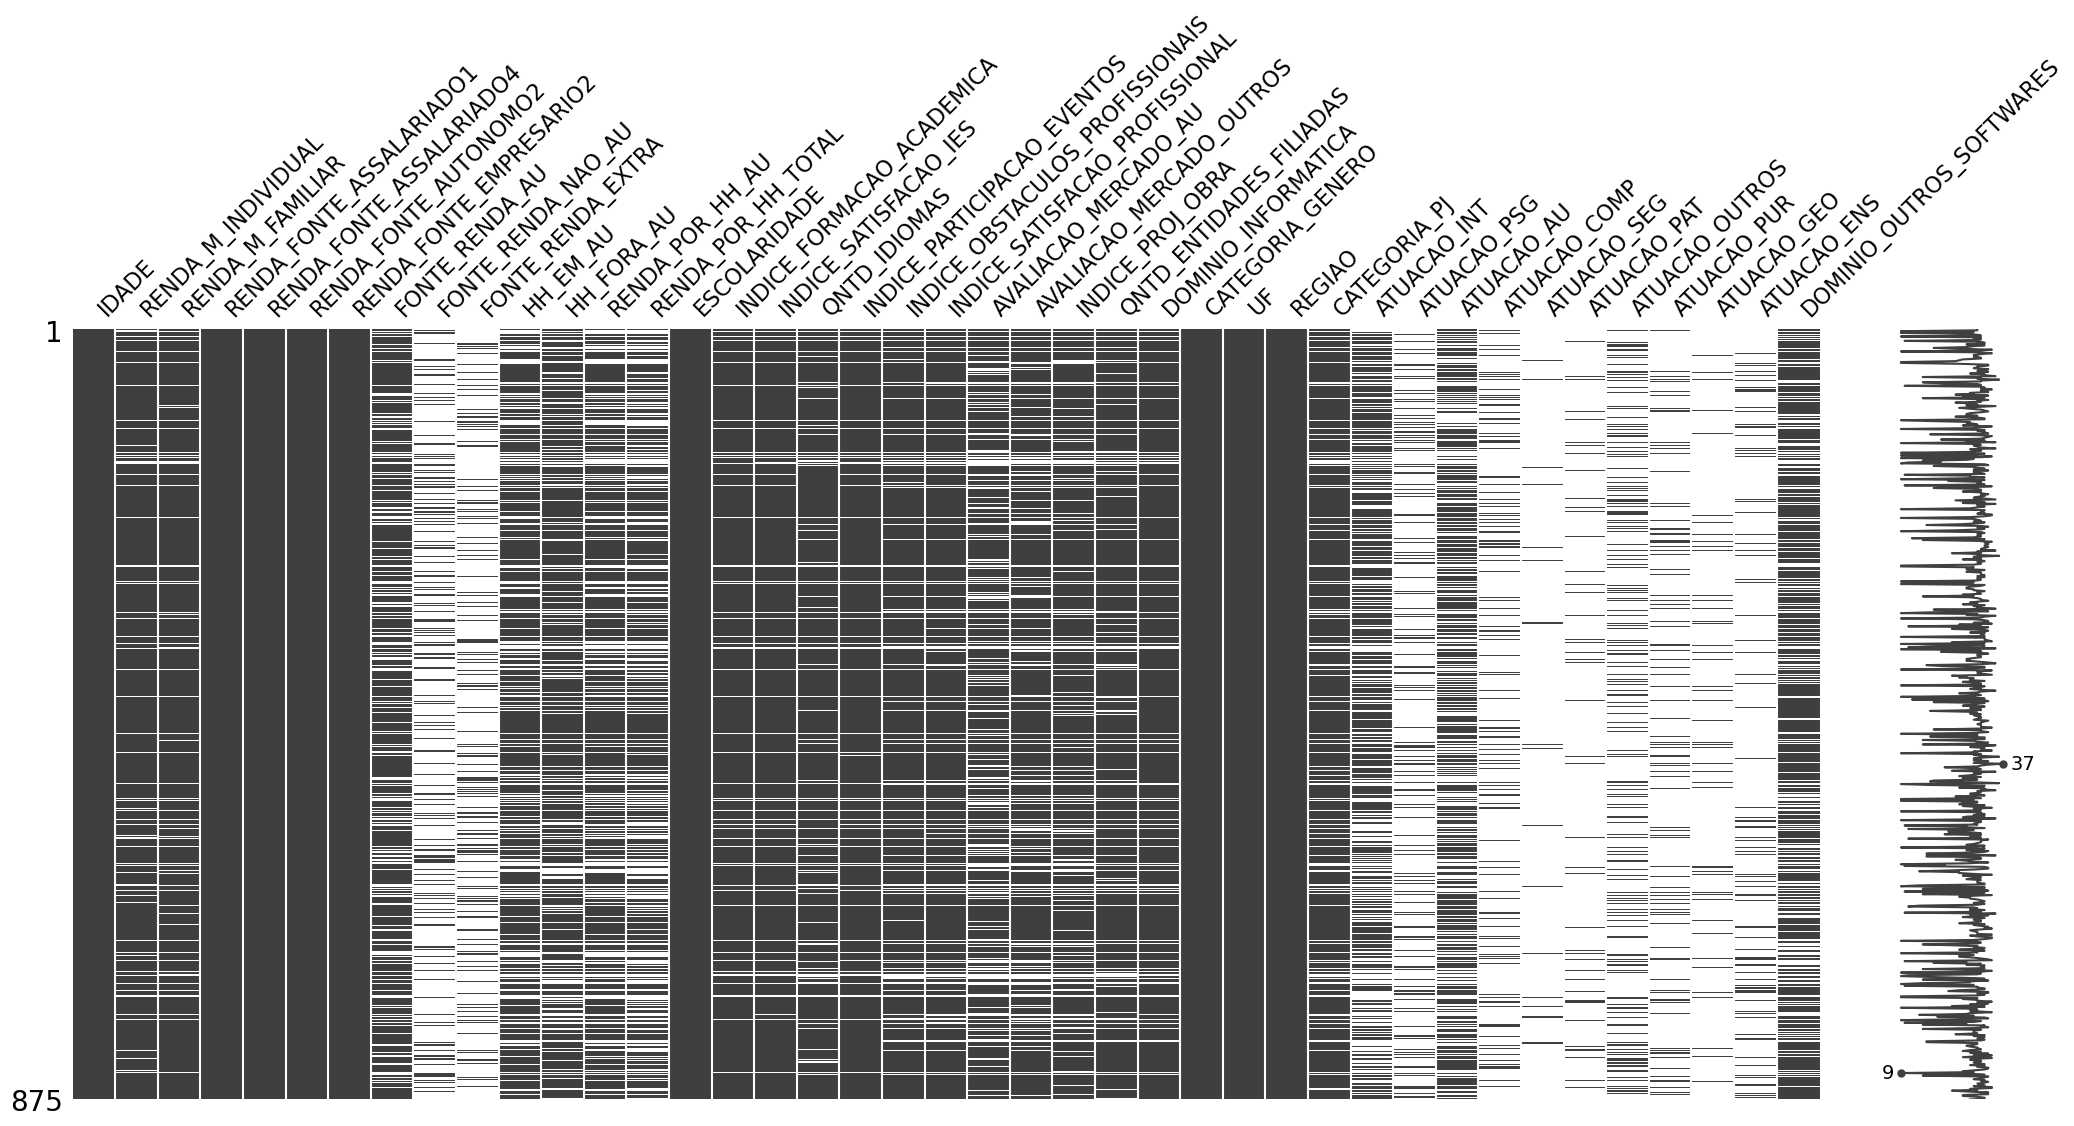

In [30]:
msno.matrix(df_1_tratamento)

In [31]:
df_1_tratamento.isnull().values.sum()

11608

In [32]:
print((df_1_tratamento.isna().sum() / len(df_1_tratamento)).sort_values(ascending=False))

ATUACAO_SEG                        0.976000
ATUACAO_PAT                        0.945143
ATUACAO_GEO                        0.942857
ATUACAO_ENS                        0.891429
ATUACAO_PUR                        0.876571
ATUACAO_COMP                       0.844571
ATUACAO_PSG                        0.826286
FONTE_RENDA_EXTRA                  0.820571
FONTE_RENDA_NAO_AU                 0.809143
ATUACAO_OUTROS                     0.796571
ATUACAO_AU                         0.422857
ATUACAO_INT                        0.404571
RENDA_POR_HH_TOTAL                 0.385143
DOMINIO_OUTROS_SOFTWARES           0.308571
RENDA_POR_HH_AU                    0.299429
HH_EM_AU                           0.286857
AVALIACAO_MERCADO_AU               0.264000
HH_FORA_AU                         0.262857
FONTE_RENDA_AU                     0.246857
AVALIACAO_MERCADO_OUTROS           0.211429
INDICE_PROJ_OBRA                   0.204571
QNTD_ENTIDADES_FILIADAS            0.156571
CATEGORIA_PJ                    

In [33]:
df_1_tratamento[df_1_tratamento.CATEGORIA_GENERO.isna()].CATEGORIA_GENERO.index.array

<PandasArray>
[]
Length: 0, dtype: object

## 1.2 Análise de Valores Faltantes / Null Analysis

### Correlação de Respostas Ignoradas

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.

Entries marked <1 or >-1 have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous. For example, in this dataset the correlation between VEHICLE CODE TYPE 3 and CONTRIBUTING FACTOR VEHICLE 3 is <1, indicating that, contrary to our expectation, there are a few records which have one or the other, but not both. These cases will require special attention.msno.dendrogram(df3)

<Axes: >

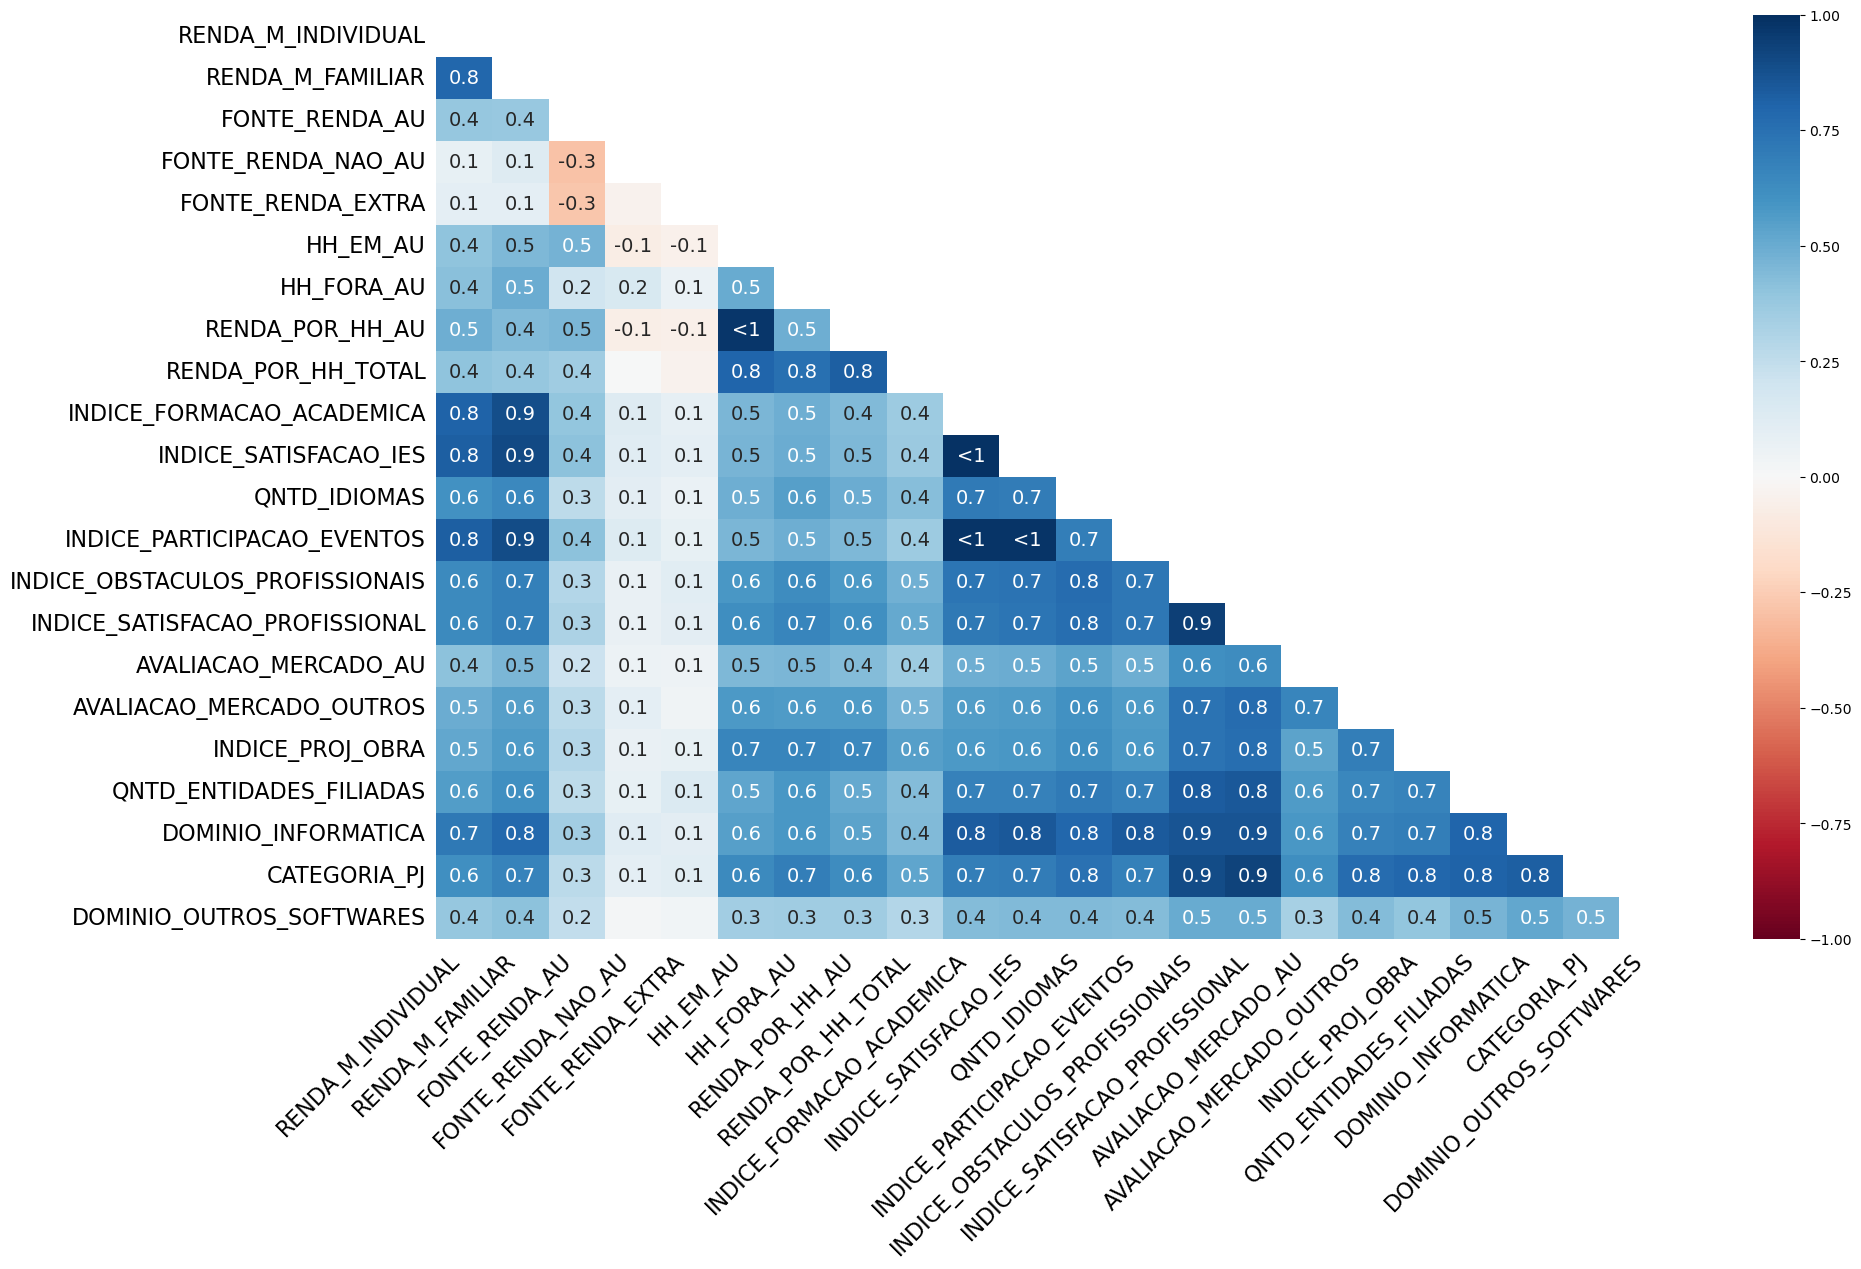

In [34]:
thresh_val = 5
msno.heatmap(df_1_tratamento.drop(columns=df.filter(regex='^ATUACAO').columns).drop(
    columns=['RENDA_FONTE_ASSALARIADO1','RENDA_FONTE_ASSALARIADO4','RENDA_FONTE_AUTONOMO2','RENDA_FONTE_EMPRESARIO2']
).dropna(thresh=thresh_val,axis=0))

<Axes: >

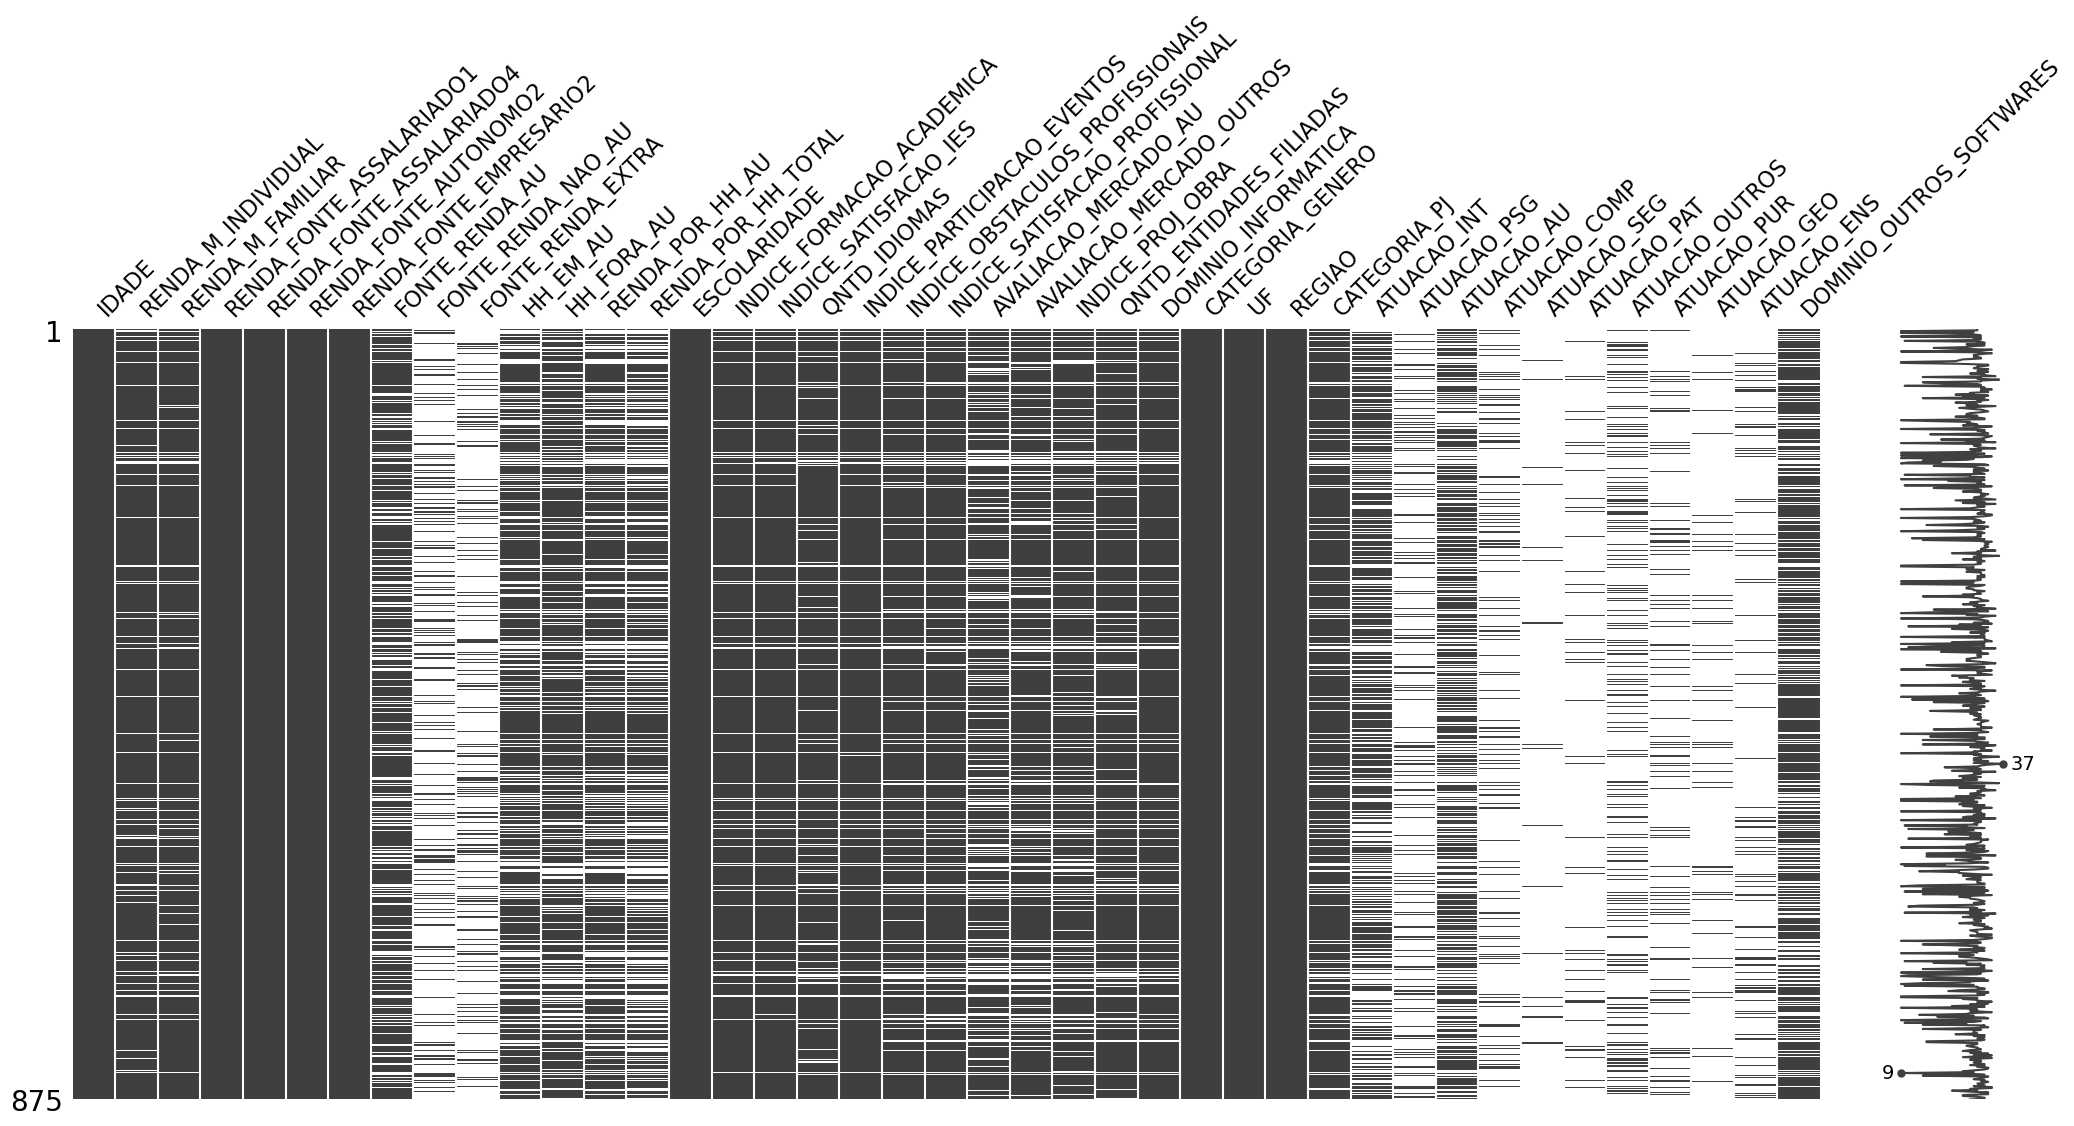

In [35]:
msno.matrix(df_1_tratamento.dropna(thresh=thresh_val,axis=0))

The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

<Axes: >

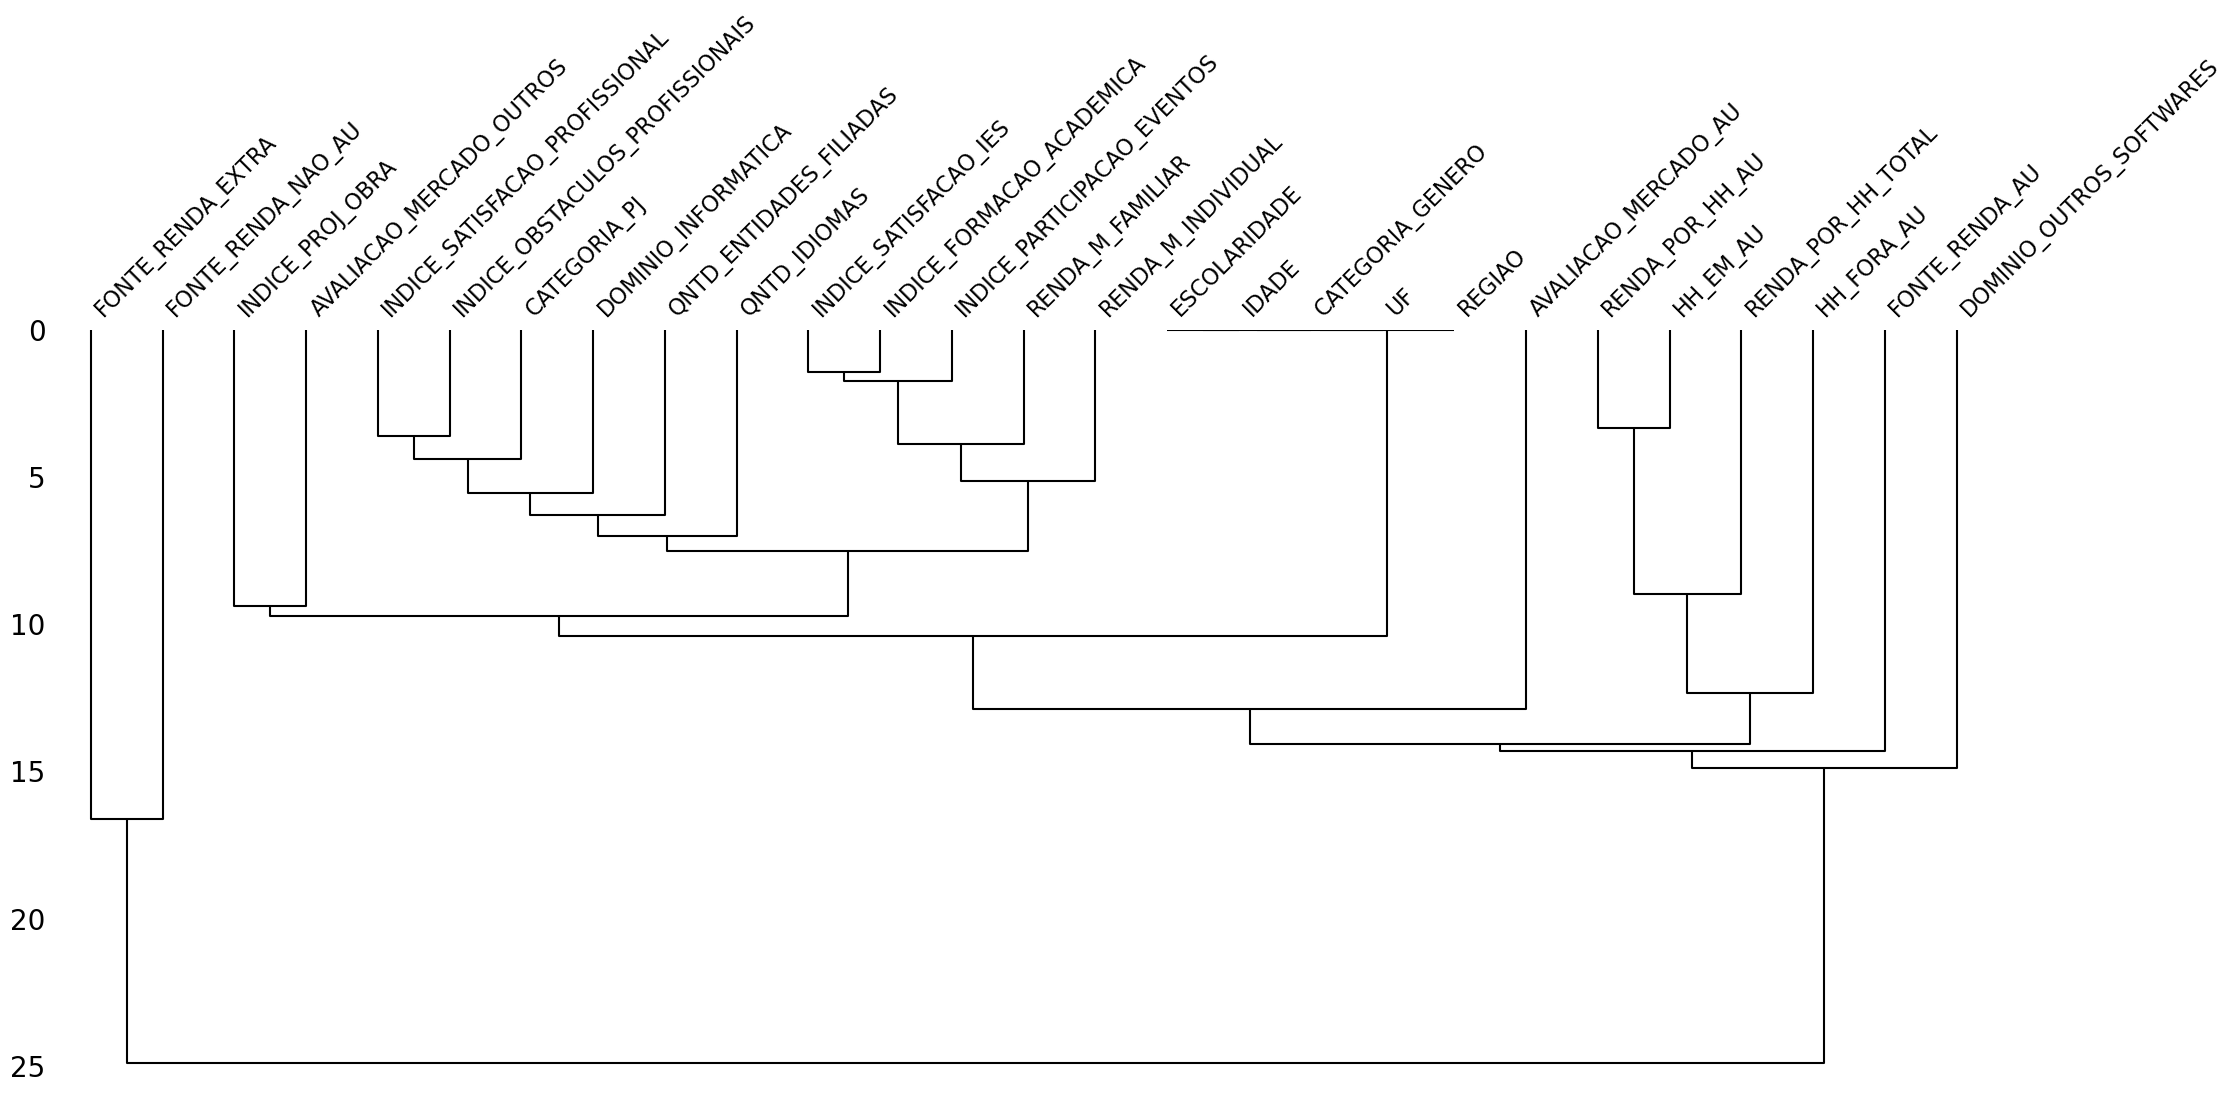

In [36]:
msno.dendrogram(df_1_tratamento.drop(columns=df.filter(regex='^ATUACAO').columns).drop(
    columns=['RENDA_FONTE_ASSALARIADO1','RENDA_FONTE_ASSALARIADO4','RENDA_FONTE_AUTONOMO2','RENDA_FONTE_EMPRESARIO2']
).dropna(thresh=thresh_val,axis=0))

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

In [37]:
df_1_tratamento

,IDADE,RENDA_M_INDIVIDUAL,RENDA_M_FAMILIAR,RENDA_FONTE_ASSALARIADO1,RENDA_FONTE_ASSALARIADO4,RENDA_FONTE_AUTONOMO2,RENDA_FONTE_EMPRESARIO2,FONTE_RENDA_AU,FONTE_RENDA_NAO_AU,FONTE_RENDA_EXTRA,...,ATUACAO_PSG,ATUACAO_AU,ATUACAO_COMP,ATUACAO_SEG,ATUACAO_PAT,ATUACAO_OUTROS,ATUACAO_PUR,ATUACAO_GEO,ATUACAO_ENS,DOMINIO_OUTROS_SOFTWARES
32,36.0,4.0,4.0,0,0,0,0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
156,35.0,NaN,8.0,0,0,0,1,1.0,1.0,NaN,...,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,4.0
165,36.0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,35.0,4.0,4.0,0,0,1,0,1.0,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
328,36.0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45273,37.0,5.0,5.0,0,0,0,0,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0
45278,37.0,5.0,6.0,0,0,0,0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0
45346,35.0,3.0,4.0,0,0,0,0,1.0,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
45353,30.0,3.0,4.0,0,0,0,0,2.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0


In [38]:
df_1_tratamento.columns.values


array(['IDADE', 'RENDA_M_INDIVIDUAL', 'RENDA_M_FAMILIAR',
       'RENDA_FONTE_ASSALARIADO1', 'RENDA_FONTE_ASSALARIADO4',
       'RENDA_FONTE_AUTONOMO2', 'RENDA_FONTE_EMPRESARIO2',
       'FONTE_RENDA_AU', 'FONTE_RENDA_NAO_AU', 'FONTE_RENDA_EXTRA',
       'HH_EM_AU', 'HH_FORA_AU', 'RENDA_POR_HH_AU', 'RENDA_POR_HH_TOTAL',
       'ESCOLARIDADE', 'INDICE_FORMACAO_ACADEMICA',
       'INDICE_SATISFACAO_IES', 'QNTD_IDIOMAS',
       'INDICE_PARTICIPACAO_EVENTOS', 'INDICE_OBSTACULOS_PROFISSIONAIS',
       'INDICE_SATISFACAO_PROFISSIONAL', 'AVALIACAO_MERCADO_AU',
       'AVALIACAO_MERCADO_OUTROS', 'INDICE_PROJ_OBRA',
       'QNTD_ENTIDADES_FILIADAS', 'DOMINIO_INFORMATICA',
       'CATEGORIA_GENERO', 'UF', 'REGIAO', 'CATEGORIA_PJ', 'ATUACAO_INT',
       'ATUACAO_PSG', 'ATUACAO_AU', 'ATUACAO_COMP', 'ATUACAO_SEG',
       'ATUACAO_PAT', 'ATUACAO_OUTROS', 'ATUACAO_PUR', 'ATUACAO_GEO',
       'ATUACAO_ENS', 'DOMINIO_OUTROS_SOFTWARES'], dtype=object)

In [39]:
def converter_integer(df):
        for coluna in df.select_dtypes(['float']).columns.tolist():
                try:
                        df[coluna] = df[coluna].astype(int)
                except ValueError:
                        pass

In [40]:
converter_integer(df_1_tratamento)
df_1_tratamento.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 32 to 45354
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IDADE                            875 non-null    int32  
 1   RENDA_M_INDIVIDUAL               795 non-null    float64
 2   RENDA_M_FAMILIAR                 793 non-null    float64
 3   RENDA_FONTE_ASSALARIADO1         875 non-null    int8   
 4   RENDA_FONTE_ASSALARIADO4         875 non-null    int8   
 5   RENDA_FONTE_AUTONOMO2            875 non-null    int8   
 6   RENDA_FONTE_EMPRESARIO2          875 non-null    int8   
 7   FONTE_RENDA_AU                   659 non-null    float64
 8   FONTE_RENDA_NAO_AU               167 non-null    float64
 9   FONTE_RENDA_EXTRA                157 non-null    float64
 10  HH_EM_AU                         624 non-null    float64
 11  HH_FORA_AU                       645 non-null    float64
 12  RENDA_POR_HH_AU         

# 4. Exportação

In [42]:
arquivo = 'DF_CAU_01.parquet'
df_1_tratamento.to_parquet(os.path.join(diretorio_df, arquivo), engine='pyarrow', compression='gzip')